In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv


In [4]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv").drop('id', axis=1)
train_df

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
...,...,...,...,...,...,...,...,...,...,...
524159,0.796831,-13.405645,0.023500,0.504738,0.000001,0.191414,0.668079,135528.3189,0.004400,117.83118
524160,0.975000,-12.132914,0.077379,0.069462,0.262320,0.124818,0.288946,240709.3918,0.447067,89.02681
524161,0.542958,-1.357000,0.071390,0.168978,0.000001,0.313912,0.586868,344858.2321,0.718800,90.75885
524162,0.637192,-7.411331,0.113086,0.000005,0.061946,0.287963,0.368891,322710.3187,0.944267,140.63235


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   AudioLoudness              524164 non-null  float64
 2   VocalContent               524164 non-null  float64
 3   AcousticQuality            524164 non-null  float64
 4   InstrumentalScore          524164 non-null  float64
 5   LivePerformanceLikelihood  524164 non-null  float64
 6   MoodScore                  524164 non-null  float64
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float64
 9   BeatsPerMinute             524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


In [6]:
for col in list(train_df.columns):
    train_df[col] = train_df[col].astype('float32')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float32
 1   AudioLoudness              524164 non-null  float32
 2   VocalContent               524164 non-null  float32
 3   AcousticQuality            524164 non-null  float32
 4   InstrumentalScore          524164 non-null  float32
 5   LivePerformanceLikelihood  524164 non-null  float32
 6   MoodScore                  524164 non-null  float32
 7   TrackDurationMs            524164 non-null  float32
 8   Energy                     524164 non-null  float32
 9   BeatsPerMinute             524164 non-null  float32
dtypes: float32(10)
memory usage: 20.0 MB


In [8]:
train_df.describe()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,0.632843,-8.379015,0.074443,0.262913,0.117690,0.178398,0.555843,241903.687500,0.500923,119.034897
std,0.156882,4.615849,0.049878,0.223017,0.131728,0.118232,0.225399,59324.597656,0.289948,26.465378
min,0.076900,-27.509726,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.717999
25%,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.875000,0.254933,101.070412
50%,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.062500,0.511800,118.747658
75%,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.648438,0.746000,136.686584
max,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.218750,1.000000,206.037003


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

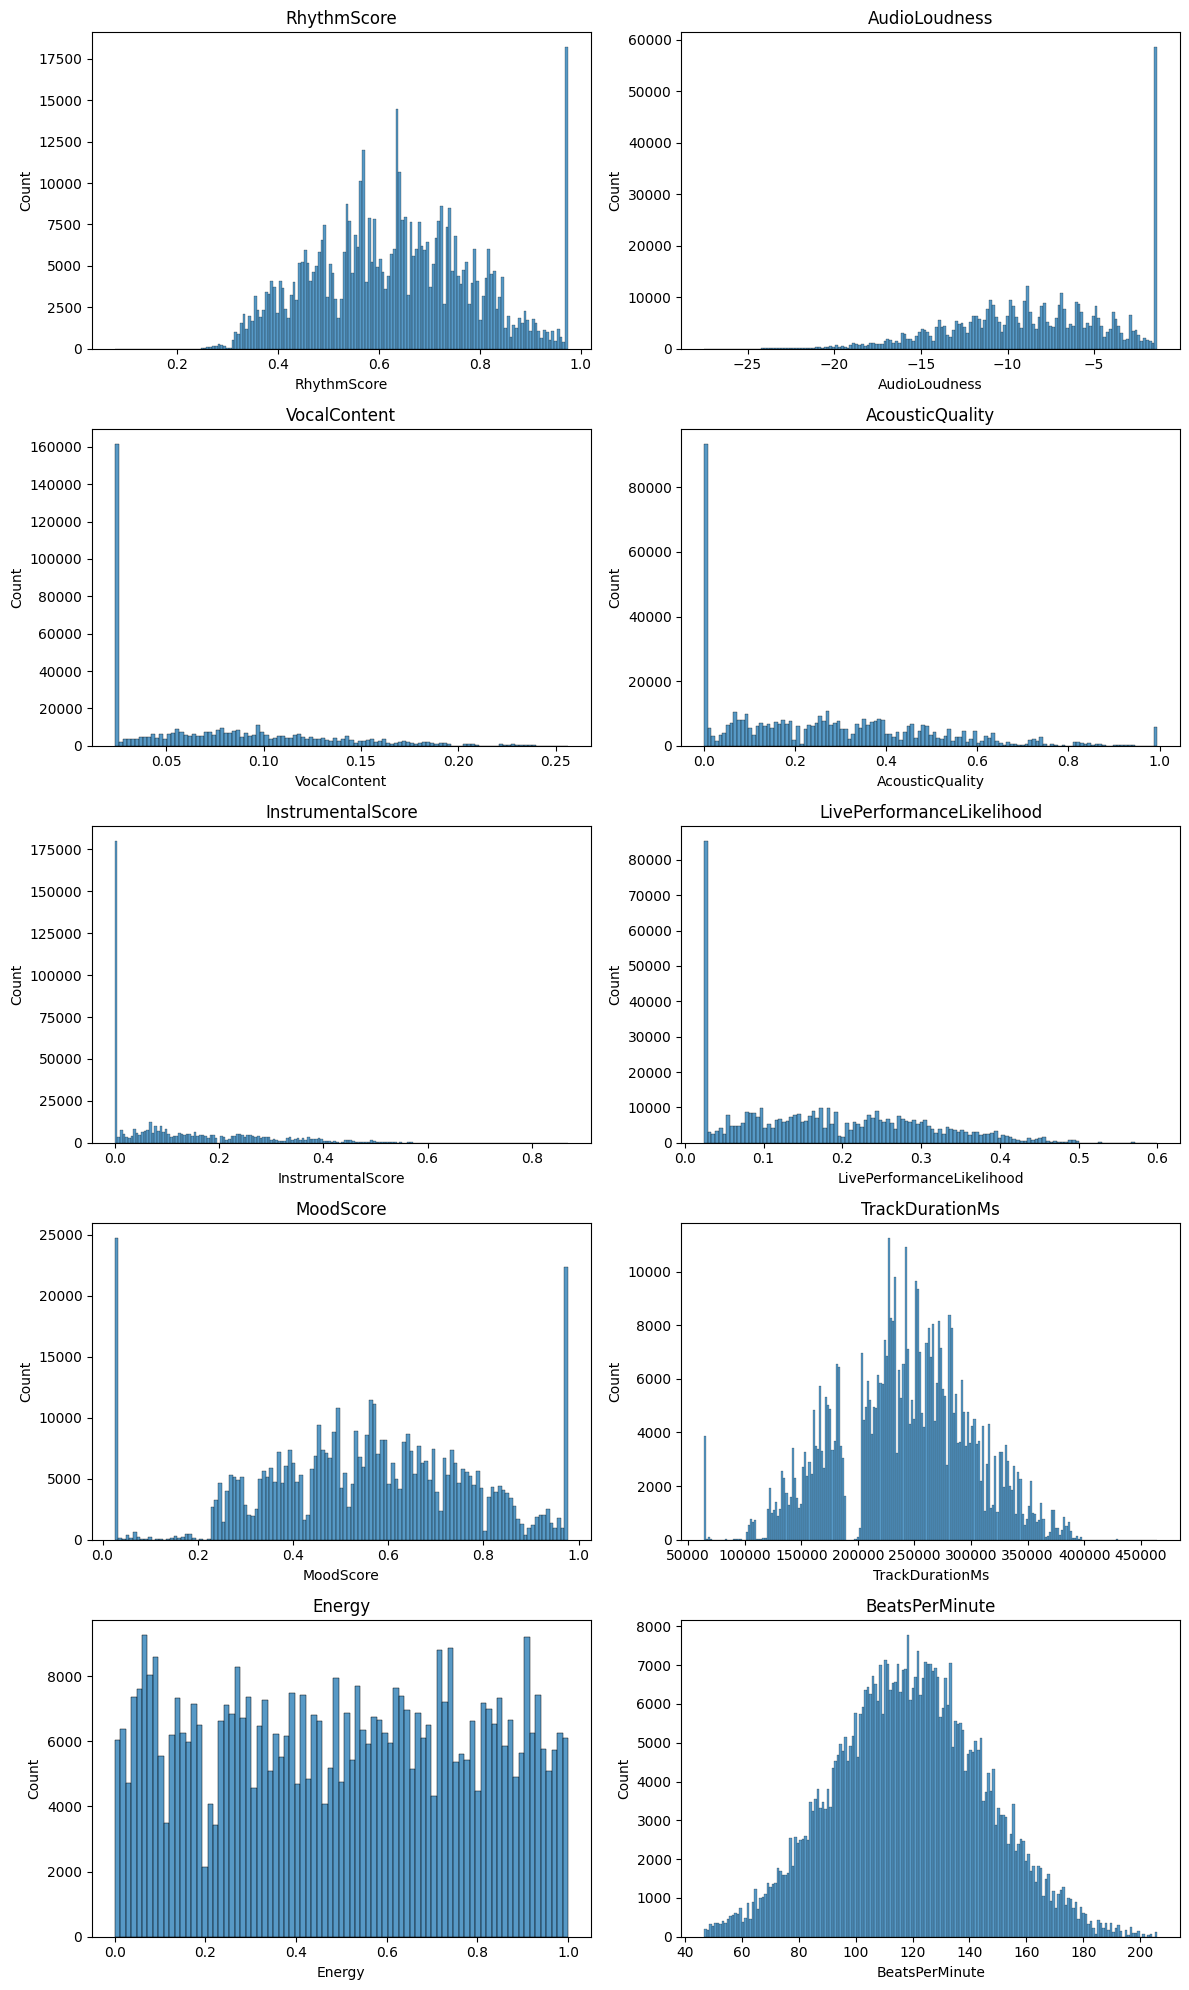

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_data(df):
    cols = list(df.columns)

    n_cols = 2
    n_rows = math.ceil(len(cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
    axes = axes.flatten()  # flatten in case it's a 2D array

    for i, col in enumerate(cols):
        sns.histplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col)

    # Hide unused subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_data(train_df)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df.drop('BeatsPerMinute', axis=1)
y = train_df['BeatsPerMinute']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))

26.67665555899777


<Axes: xlabel='BeatsPerMinute'>

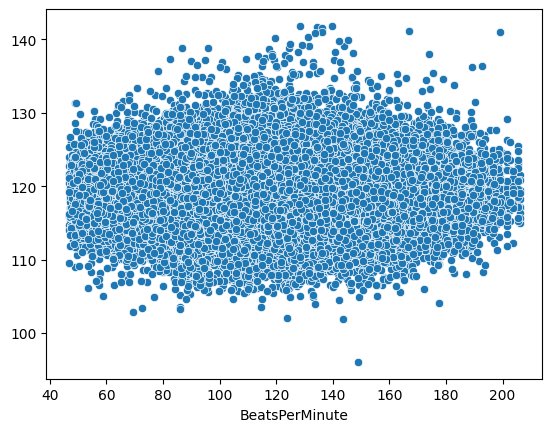

In [13]:
sns.scatterplot(x=y_test, y=y_pred)